In [61]:
!git clone https://github.com/KiranRathod4/Netflix_data_analysis.git

Cloning into 'Netflix_data_analysis'...


In [62]:
!ls

netflix1.csv  Netflix_data_analysis  sample_data


Necessary libraries


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('/content/netflix1.csv',lineterminator='\n')

In [8]:
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in\r
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries\r
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries\r"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies\r"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movi..."


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
    8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [10]:
df['listed_in\r'].head()

,listed_in\r
0,Documentaries\r
1,"Crime TV Shows, International TV Shows, TV Act..."
2,"TV Dramas, TV Horror, TV Mysteries\r"
3,"Children & Family Movies, Comedies\r"
4,"Dramas, Independent Movies, International Movi..."


In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:
df.describe()

,release_year
count,8790.000000
mean,2014.183163
std,8.825466
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


# EDA summary
1.total entries - 8790

2.no null values

3.date_added column needs to be casted into date time and to extract only the year value  

4.remove unnecessary columns

In [13]:
df['date_added']=pd.to_datetime(df['date_added'])
print(df['date_added'].dtype)


datetime64[ns]


In [14]:
df['date_added']=df['date_added'].dt.year
df['date_added'].dtypes

dtype('int32')

In [15]:
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in\r
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021,2020,PG-13,90 min,Documentaries\r
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries\r"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies\r"
4,s8,Movie,Sankofa,Haile Gerima,United States,2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movi..."


Dropping the columns


In [16]:
cols = ['show_id','release_year','country','duration']

In [17]:
df.drop(cols,axis=1,inplace=True)
df.columns


Index(['type', 'title', 'director', 'date_added', 'rating', 'listed_in\r'], dtype='object')

In [18]:
df.head()

,type,title,director,date_added,rating,listed_in\r
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,2021,PG-13,Documentaries\r
1,TV Show,Ganglands,Julien Leclercq,2021,TV-MA,"Crime TV Shows, International TV Shows, TV Act..."
2,TV Show,Midnight Mass,Mike Flanagan,2021,TV-MA,"TV Dramas, TV Horror, TV Mysteries\r"
3,Movie,Confessions of an Invisible Girl,Bruno Garotti,2021,TV-PG,"Children & Family Movies, Comedies\r"
4,Movie,Sankofa,Haile Gerima,2021,TV-MA,"Dramas, Independent Movies, International Movi..."


In [19]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=df)

https://docs.google.com/spreadsheets/d/1kJkgoIZLYzTQQro_QpSm0QwG-ssF8b_QpSBM1dUpRl8/edit#gid=0


value counts

In [22]:
df['type'].value_counts()

,count
type,
Movie,6126
TV Show,2664


if there is any null values or duplicate values

In [23]:
df.dropna(inplace=True)
df.isna().sum()

,0
type,0
title,0
director,0
date_added,0
rating,0
listed_in\r,0


# we would split listed_in\r into a list and then explode our dataframe to have only one genre per for each movie

In [24]:
df.head()

,type,title,director,date_added,rating,listed_in\r
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,2021,PG-13,Documentaries\r
1,TV Show,Ganglands,Julien Leclercq,2021,TV-MA,"Crime TV Shows, International TV Shows, TV Act..."
2,TV Show,Midnight Mass,Mike Flanagan,2021,TV-MA,"TV Dramas, TV Horror, TV Mysteries\r"
3,Movie,Confessions of an Invisible Girl,Bruno Garotti,2021,TV-PG,"Children & Family Movies, Comedies\r"
4,Movie,Sankofa,Haile Gerima,2021,TV-MA,"Dramas, Independent Movies, International Movi..."


In [27]:
df['listed_in\r'] =df['listed_in\r'].str.split(',')
df = df.explode('listed_in\r').reset_index(drop=True)
df.head()

,type,title,director,date_added,rating,listed_in\r
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,2021,PG-13,Documentaries\r
1,TV Show,Ganglands,Julien Leclercq,2021,TV-MA,Crime TV Shows
2,TV Show,Ganglands,Julien Leclercq,2021,TV-MA,International TV Shows
3,TV Show,Ganglands,Julien Leclercq,2021,TV-MA,TV Action & Adventure\r
4,TV Show,Midnight Mass,Mike Flanagan,2021,TV-MA,TV Dramas


# casting column into category

In [28]:
df['listed_in\r'] = df['listed_in\r'].astype('category')
df['listed_in\r'].dtypes

CategoricalDtype(categories=[' Anime Features', ' Anime Features\r',
                  ' Children & Family Movies', ' Children & Family Movies\r',
                  ' Classic & Cult TV', ' Classic Movies', ' Classic Movies\r',
                  ' Comedies', ' Comedies\r', ' Crime TV Shows',
                  ...
                  'TV Action & Adventure', 'TV Action & Adventure\r',
                  'TV Comedies', 'TV Comedies\r', 'TV Dramas', 'TV Dramas\r',
                  'TV Horror', 'TV Sci-Fi & Fantasy', 'TV Shows\r',
                  'Thrillers\r'],
, ordered=False, categories_dtype=object)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19294 entries, 0 to 19293
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   type        19294 non-null  object  
 1   title       19294 non-null  object  
 2   director    19294 non-null  object  
 3   date_added  19294 non-null  int32   
 4   rating      19294 non-null  object  
  19294 non-null  category
dtypes: category(1), int32(1), object(4)
memory usage: 702.3+ KB


In [30]:
df.nunique()

,0
type,2
title,8787
director,4528
date_added,14
rating,14
listed_in\r,124


# Data Visualization

In [31]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,5))

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

# what is the most frequent genre of movies released on Netflix

In [32]:
df['listed_in\r'].describe()

,listed_in\r
count,19294
unique,124
top,International Movies\r
freq,1786


(array([   0.,  500., 1000., 1500., 2000.]),
 [Text(0.0, 0, '0'),
  Text(500.0, 0, '500'),
  Text(1000.0, 0, '1000'),
  Text(1500.0, 0, '1500'),
  Text(2000.0, 0, '2000')])

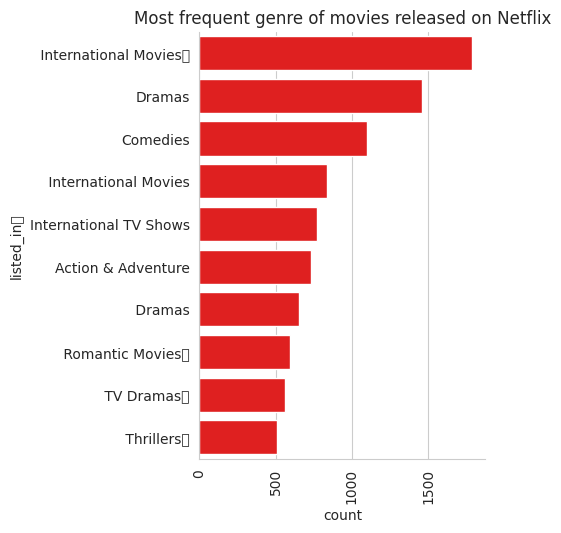

In [45]:
sns.catplot(y='listed_in\r',data=df,kind='count',
            order = df['listed_in\r'].value_counts().index[:10],
            color='red')

plt.title('Most frequent genre of movies released on Netflix')
plt.xticks(rotation=90)

In [46]:
df.head()

,type,title,director,date_added,rating,listed_in\r
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,2021,PG-13,Documentaries\r
1,TV Show,Ganglands,Julien Leclercq,2021,TV-MA,Crime TV Shows
2,TV Show,Ganglands,Julien Leclercq,2021,TV-MA,International TV Shows
3,TV Show,Ganglands,Julien Leclercq,2021,TV-MA,TV Action & Adventure\r
4,TV Show,Midnight Mass,Mike Flanagan,2021,TV-MA,TV Dramas


Lowest popular

In [47]:
df[df['title']==df['title'].min()]

,type,title,director,date_added,rating,listed_in\r
3717,Movie,#Alive,Cho Il,2020,TV-MA,Horror Movies
3718,Movie,#Alive,Cho Il,2020,TV-MA,International Movies
3719,Movie,#Alive,Cho Il,2020,TV-MA,Thrillers\r


Highest popular

In [48]:
df[df['title']==df['title'].max()]

,type,title,director,date_added,rating,listed_in\r
11256,Movie,최강전사 미니특공대 : 영웅의 탄생,Young Jun Lee,2018,TV-Y7,Children & Family Movies\r


# which year has the most filmmed movies

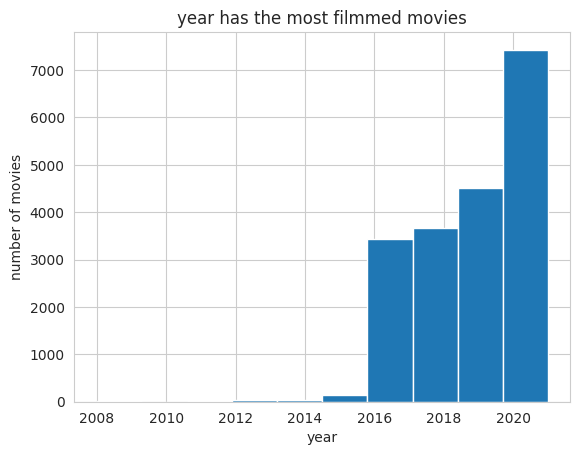

In [51]:
df['date_added'].hist()
color='red'
plt.xlabel('year')
plt.ylabel('number of movies')
plt.title('year has the most filmmed movies')
plt.show()

# Summary


    1.Data Loading and Initial Inspection: The code loads the netflix1.csv dataset into a pandas DataFrame, checks for null values and duplicates, and displays basic information about the data.

    2.Data Cleaning and Transformation: The date_added column is converted to datetime objects and then to just the year. Several columns (show_id, release_year, country, duration) are dropped. The listed_in\r column is split into lists and the DataFrame is exploded to have one genre per row. The listed_in\r column is then cast to a categorical type.

    3.Value Counts: The code calculates and displays the value counts for the 'type' column, showing the distribution of Movies and TV Shows.
    Handling Missing Values: The code checks for and removes any remaining null values.

    4.Data Visualization: A count plot is generated to visualize the most frequent genres on Netflix, and a histogram shows the distribution of content added over the years.


# Conclusion
Based on the analysis, we can conclude that "International Movies" is the most frequent genre on Netflix, and the number of movies and TV shows added to the platform has significantly increased over the years, with a peak around 2019-2021.

In [54]:
!git init

hint: Using 'master' as the name for the initial branch. This default branch name
hint: is subject to change. To configure the initial branch name to use in all
hint: of your new repositories, which will suppress this warning, call:
hint: 
hint: 	git config --global init.defaultBranch <name>
hint: 
hint: Names commonly chosen instead of 'master' are 'main', 'trunk' and
hint: 'development'. The just-created branch can be renamed via this command:
hint: 
hint: 	git branch -m <name>
Initialized empty Git repository in /content/.git/


In [66]:
!git add .

error: 'Netflix_data_analysis/' does not have a commit checked out
fatal: adding files failed


In [67]:
!git status

On branch master
Untracked files:
  (use "git add <file>..." to include in what will be committed)
	Netflix_data_analysis/

nothing added to commit but untracked files present (use "git add" to track)


In [68]:
!git commit -m"analysed all the movies data and made some conclusion"

On branch master
Untracked files:
  (use "git add <file>..." to include in what will be committed)
	Netflix_data_analysis/

nothing added to commit but untracked files present (use "git add" to track)


In [69]:
!git add .

error: 'Netflix_data_analysis/' does not have a commit checked out
fatal: adding files failed


In [63]:
!git config --global user.email "kiranrathod@gmail.com"

In [64]:
!git config --global user.name "Kiran Rathod"

In [65]:
!git commit -m"analysed all the movies data and made some conclusion"

On branch master
Untracked files:
  (use "git add <file>..." to include in what will be committed)
	Netflix_data_analysis/

nothing added to commit but untracked files present (use "git add" to track)


In [70]:
!ls

netflix1.csv  Netflix_data_analysis  sample_data


In [71]:
!git remote add origin https://github.com/KiranRathod4/Netflix_data_analysis.git

In [72]:
!git status

On branch master
Untracked files:
  (use "git add <file>..." to include in what will be committed)
	Netflix_data_analysis/

nothing added to commit but untracked files present (use "git add" to track)


In [73]:
!git commit -m"analysed all the movies data and made some conclusion"

On branch master
Untracked files:
  (use "git add <file>..." to include in what will be committed)
	Netflix_data_analysis/

nothing added to commit but untracked files present (use "git add" to track)


In [74]:
!git add README.md

fatal: pathspec 'README.md' did not match any files


In [75]:
!git push -u origin main

error: src refspec main does not match any
error: failed to push some refs to 'https://github.com/KiranRathod4/Netflix_data_analysis.git'


In [76]:
!git remote add origin https://github.com/KiranRathod4/Netflix_data_analysis.git

error: remote origin already exists.


In [77]:
!mv /content/Netflix_data_analysis.ipynb /content/Netflix_data_analysis/

mv: cannot stat '/content/Netflix_data_analysis.ipynb': No such file or directory


In [78]:
%cd /content/Netflix_data_analysis/

/content/Netflix_data_analysis


In [79]:
!git add .

In [80]:
!git commit -m "Add Netflix data analysis notebook"

On branch main

Initial commit

nothing to commit (create/copy files and use "git add" to track)


In [82]:
!git push origin

error: src refspec master does not match any
error: failed to push some refs to 'https://github.com/KiranRathod4/Netflix_data_analysis.git'


In [85]:
!git branch -M main

In [86]:
!git push origin main

error: src refspec main does not match any
error: failed to push some refs to 'https://github.com/KiranRathod4/Netflix_data_analysis.git'


In [87]:
!git status

On branch main

No commits yet

nothing to commit (create/copy files and use "git add" to track)


In [88]:
!git add .

In [89]:
!git commit -m "Add Netflix data analysis notebook"

On branch main

Initial commit

nothing to commit (create/copy files and use "git add" to track)


In [110]:
!mv /content/Netflix_data_analysis.ipynb /content/Netflix_data_analysis/

mv: cannot stat '/content/Netflix_data_analysis.ipynb': No such file or directory


In [90]:
!git push origin main

error: src refspec main does not match any
error: failed to push some refs to 'https://github.com/KiranRathod4/Netflix_data_analysis.git'


In [91]:
!git branch

In [92]:
!git remote -v

origin	https://github.com/KiranRathod4/Netflix_data_analysis.git (fetch)
origin	https://github.com/KiranRathod4/Netflix_data_analysis.git (push)


In [93]:
!git branch main

fatal: Not a valid object name: 'main'.


In [94]:
!git push origin main

error: src refspec main does not match any
error: failed to push some refs to 'https://github.com/KiranRathod4/Netflix_data_analysis.git'


In [95]:
!git add .

In [96]:
!git commit -m "Initial commit"

On branch main

Initial commit

nothing to commit (create/copy files and use "git add" to track)


In [97]:
!git branch main

fatal: Not a valid object name: 'main'.


In [98]:
!git push origin main

error: src refspec main does not match any
error: failed to push some refs to 'https://github.com/KiranRathod4/Netflix_data_analysis.git'


In [99]:
!ls /content/Netflix_data_analysis/

In [100]:
!git add .

In [101]:
!git commit -m "Add Netflix data analysis notebook"

On branch main

Initial commit

nothing to commit (create/copy files and use "git add" to track)


In [102]:
!git push origin main

error: src refspec main does not match any
error: failed to push some refs to 'https://github.com/KiranRathod4/Netflix_data_analysis.git'


In [103]:
!ls /content/Netflix_data_analysis/

In [104]:
!git status

On branch main

No commits yet

nothing to commit (create/copy files and use "git add" to track)


In [105]:
!mv /content/Netflix_data_analysis.ipynb /content/Netflix_data_analysis/

mv: cannot stat '/content/Netflix_data_analysis.ipynb': No such file or directory


In [106]:
!git add .

In [107]:
!git commit -m "Add Netflix data analysis notebook"

On branch main

Initial commit

nothing to commit (create/copy files and use "git add" to track)


In [108]:
!git push origin main

error: src refspec main does not match any
error: failed to push some refs to 'https://github.com/KiranRathod4/Netflix_data_analysis.git'


In [109]:
!ls /content/

netflix1.csv  Netflix_data_analysis  sample_data


In [111]:
!mv /content/Netflix_data_analysis.ipynb /content/Netflix_data_analysis/

mv: cannot stat '/content/Netflix_data_analysis.ipynb': No such file or directory
